## 1.Introduction

The data come from the Kaggle dataset Car Features and MSRP of Kaggle. It describes almost 12 000 car models sold in the USA between 1990 and 2018 with the market price and some features. This study is intended to conduct an analysis leading to the construction of a model that will best predict the price of a car based on the information collected in this database.

This is a regression problem that will be solved using 3 models: Linear Regression, Support Vector Machine and Random Forest. 
Statistics such as mean squared error, mean absolute error and R^2 will be used to evaluate the models.

The main focus will be on the modeling process and the selection of appropriate hyperparameters

Data description:

In [1]:
# Make                Car Make
# Model               Car Model
# Year                Car Year Productuin
# Engine Fuel Type    Engine Fuel Type
# Engine HP           Engine Horse Power (HP)
# Engine Cylinders    Engine Cylinders
# Transmission Type   Transmission Type
# Driven_Wheels       Driven Wheels
# Number of Doors     Number of Doors
# Market Category     Market Category
# Vehicle Size        Size of Vehicle
# Vehicle Style       Type of Vehicle
# highway MPG         Highway MPG
# city mpg            City MPG
# Popularity          Popularity (Twitter)
# MSRP                Manufacturer Suggested Retail Price


## 2. Development environment preparation

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 5)
import seaborn as sns
sns.set_theme()
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import linear_model
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
path=os.getcwd()
pd.options.mode.chained_assignment = None  # default='warn'



## 3. Data structure and data cleaning

We start the analysis by reviewing the data structure.

In [3]:
data=pd.read_csv(path+'\\data\\data.csv')
display(data.head())
display(data.info())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

None

In [4]:
df_copy= data.copy()
display(df_copy.describe(include='all'))

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


The database contains 11,914 observations and 16 variables

Let's start with data cleaning

In [5]:
#checking for any duplicates in the data
df_copy.duplicated().sum()

715

In [6]:
df_copy.drop_duplicates(keep=False,inplace=True)
#removing the duplicates in the data
df_copy.duplicated().sum()

0

In [7]:
print('Columns with null values:\n', df_copy.isnull().sum())



Columns with null values:
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3092
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


We have a 5 variables with a missing values in data: Engine Fuel Type, Engine HP, Engine Cylinders, Number of Doors, Market Category. 
We start data cleaning with numerical variables, so first Engine HP.


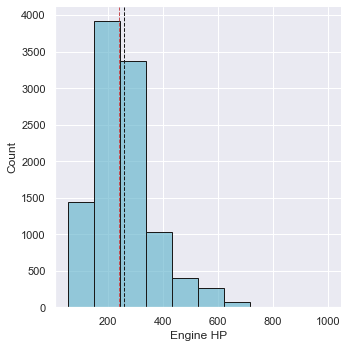

In [8]:
sns.displot(df_copy['Engine HP'], bins=10, color='c', edgecolor='k', alpha=0.65)

plt.axvline(df_copy['Engine HP'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_copy['Engine HP'].median(), color='r', linestyle='dashed', linewidth=1)

plt.show()

I think that missing values in Engine HP can fill a median value of all observations.


In [9]:
df_copy['Engine HP'].fillna(df_copy['Engine HP'].median(),inplace=True)
df_copy['Engine HP'].isnull().sum()

0

Next is a Engine Cylinders.

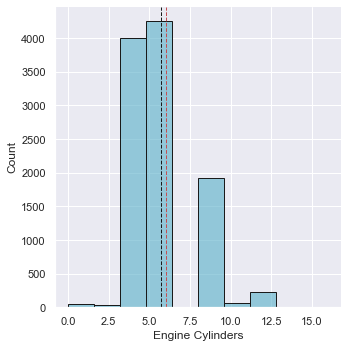

In [10]:
sns.displot(df_copy['Engine Cylinders'], bins=10, color='c', edgecolor='k', alpha=0.65)
plt.axvline(df_copy['Engine Cylinders'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_copy['Engine Cylinders'].median(), color='r', linestyle='dashed', linewidth=1)

plt.show()

In [11]:
df_copy['Engine Cylinders'].value_counts()

6.0     4138
4.0     4000
8.0     1920
12.0     226
5.0      117
10.0      62
0.0       56
3.0       30
16.0       3
Name: Engine Cylinders, dtype: int64

So, we have a 9 unique value. It's not exactly a continuous variable. In addition we see a doubt, because it is impossible that car have 0 cylinders, so we should correct it. Therefore we put missing values and values 0 to the group with most frequent value(4.0)

In [12]:
df_copy['Engine Cylinders'].fillna(4.0,inplace=True)
df_copy['Engine Cylinders'].replace(0.0,4.0,inplace=True)
df_copy['Engine Cylinders'].value_counts()

6.0     4138
4.0     4086
8.0     1920
12.0     226
5.0      117
10.0      62
3.0       30
16.0       3
Name: Engine Cylinders, dtype: int64

Last continuous variable with missing values is number of doors. Let's go over this

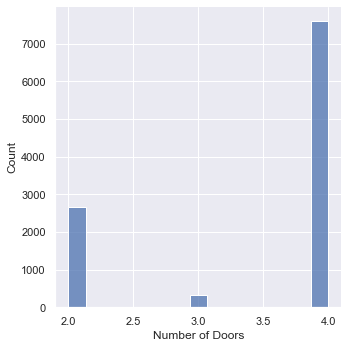

4.0    7598
2.0    2655
3.0     323
Name: Number of Doors, dtype: int64

In [13]:
sns.displot(df_copy['Number of Doors'])
plt.show()
display(df_copy['Number of Doors'].value_counts())

Okay, let's replace missing values to 4 - most frequent value

In [14]:
df_copy['Number of Doors'].fillna(4,inplace=True)

Now, I take care about categorical variables with missing values. Start with Engine Fuel Type

In [15]:
df_copy['Engine Fuel Type'].value_counts()

regular unleaded                                6234
premium unleaded (required)                     1905
premium unleaded (recommended)                  1267
flex-fuel (unleaded/E85)                         875
diesel                                           146
electric                                          66
flex-fuel (premium unleaded required/E85)         52
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

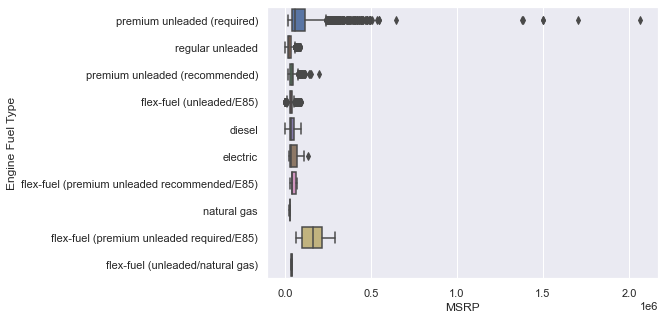

In [16]:
sns.boxplot(y='Engine Fuel Type',x='MSRP',data=df_copy)
plt.show()

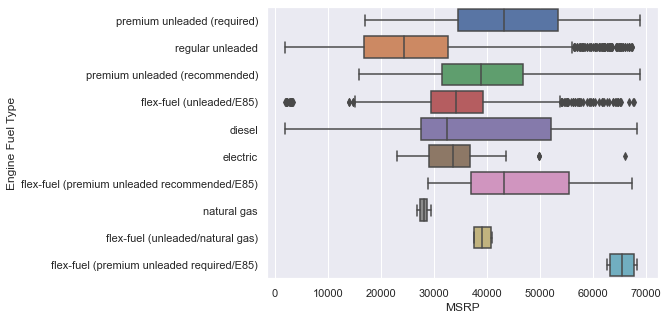

In [17]:
sns.boxplot(data=df_copy[df_copy['MSRP']<np.quantile(df_copy["MSRP"],0.9)],y='Engine Fuel Type',x='MSRP')
plt.show()

I think it's worth create new group "other" for observations "flex-fuel (premium unleaded recommended/E85)", "flex-fuel (unleaded/natural gas)", "natural gas" and for missing values 

In [18]:
df_copy['Engine Fuel Type'].replace("flex-fuel (premium unleaded recommended/E85)","other",inplace=True)
df_copy['Engine Fuel Type'].replace("flex-fuel (unleaded/natural gas)","other",inplace=True)
df_copy['Engine Fuel Type'].replace("natural gas","other",inplace=True)
df_copy['Engine Fuel Type'].fillna('other',inplace=True)
df_copy['Engine Fuel Type'].value_counts()

regular unleaded                             6234
premium unleaded (required)                  1905
premium unleaded (recommended)               1267
flex-fuel (unleaded/E85)                      875
diesel                                        146
electric                                       66
flex-fuel (premium unleaded required/E85)      52
other                                          37
Name: Engine Fuel Type, dtype: int64

Last variable, which I should cleaninng is a Market Category

In [19]:
display(df_copy['Market Category'].value_counts(ascending=True).head(30))
display(df_copy['Market Category'].value_counts(ascending=False).head(30))

Crossover,Exotic,Luxury,High-Performance                   1
Flex Fuel,Factory Tuner,Luxury,High-Performance            1
Exotic,Luxury,High-Performance,Hybrid                      1
Crossover,Exotic,Luxury,Performance                        1
Performance,Hybrid                                         1
Flex Fuel,Hybrid                                           2
Flex Fuel,Performance,Hybrid                               2
Crossover,Luxury,Performance,Hybrid                        2
Factory Tuner,Luxury                                       2
Hatchback,Luxury,Hybrid                                    3
Exotic,Factory Tuner,Luxury,Performance                    3
Crossover,Factory Tuner,Performance                        4
Crossover,Factory Tuner,Luxury,Performance                 5
Crossover,Hatchback,Factory Tuner,Performance              6
Crossover,Flex Fuel,Luxury,Performance                     6
Crossover,Hatchback,Performance                            6
Crossover,Flex Fuel,Perf

Crossover                                       1040
Flex Fuel                                        838
Luxury                                           785
Luxury,Performance                               645
Hatchback                                        513
Performance                                      445
Crossover,Luxury                                 404
Luxury,High-Performance                          334
Exotic,High-Performance                          247
Factory Tuner,Luxury,High-Performance            215
High-Performance                                 197
Hatchback,Performance                            144
Hybrid                                           119
Crossover,Luxury,Performance                     111
Factory Tuner,High-Performance                   102
Flex Fuel,Performance                             87
Diesel                                            84
Factory Tuner,Performance                         76
Exotic,Luxury,High-Performance                

As you can see this variable has many categories, many of which are single observations and it would be useful to group them. I suggest to group the observations by the first word in the category description, because I think it is the main key in the category, by which you can find the car

In [20]:
df_copy['Market Category']=df_copy['Market Category'].str.split(",").str.get(0)
display(df_copy['Market Category'].value_counts())

Crossover           1956
Luxury              1839
Flex Fuel           1044
Hatchback            857
Exotic               479
Performance          446
Factory Tuner        426
High-Performance     197
Diesel               127
Hybrid               119
Name: Market Category, dtype: int64

In addition we have 3092 missing value, which we replace "Other" group.

In [21]:
df_copy['Market Category'].fillna('Other',inplace=True)
display(df_copy['Market Category'].value_counts())

Other               3092
Crossover           1956
Luxury              1839
Flex Fuel           1044
Hatchback            857
Exotic               479
Performance          446
Factory Tuner        426
High-Performance     197
Diesel               127
Hybrid               119
Name: Market Category, dtype: int64

In [22]:
#Checking whether all missing values were managed
df_copy.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [23]:
display(df_copy.describe(include='all'))
display(df_copy.info())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,10582,10582,10582.000000,10582,10582.000000,10582.000000,10582,10582,10582.000000,10582,10582,10582,10582.000000,10582.000000,10582.000000,1.058200e+04
unique,48,897,NaN,8,NaN,NaN,5,4,NaN,11,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Other,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1051,156,NaN,6234,NaN,NaN,7624,3946,NaN,3092,4063,2657,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.942544,NaN,256.940465,5.725477,NaN,NaN,3.467681,NaN,NaN,NaN,26.533737,19.695143,1564.109998,4.309634e+04
std,NaN,NaN,6.968729,NaN,110.628275,1.767122,NaN,NaN,0.866500,NaN,NaN,NaN,9.093646,9.359977,1450.877905,6.289803e+04
min,NaN,NaN,1990.000000,NaN,55.000000,3.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,175.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,15.000000,549.000000,2.199500e+04
50%,NaN,NaN,2015.000000,NaN,240.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,25.000000,18.000000,1385.000000,3.130000e+04
75%,NaN,NaN,2016.000000,NaN,305.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.380000e+04


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10582 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               10582 non-null  object 
 1   Model              10582 non-null  object 
 2   Year               10582 non-null  int64  
 3   Engine Fuel Type   10582 non-null  object 
 4   Engine HP          10582 non-null  float64
 5   Engine Cylinders   10582 non-null  float64
 6   Transmission Type  10582 non-null  object 
 7   Driven_Wheels      10582 non-null  object 
 8   Number of Doors    10582 non-null  float64
 9   Market Category    10582 non-null  object 
 10  Vehicle Size       10582 non-null  object 
 11  Vehicle Style      10582 non-null  object 
 12  highway MPG        10582 non-null  int64  
 13  city mpg           10582 non-null  int64  
 14  Popularity         10582 non-null  int64  
 15  MSRP               10582 non-null  int64  
dtypes: float64(3), int64(5

None

The last variable worth looking at more closely is the target variable.

count    1.058200e+04
mean     4.309634e+04
std      6.289803e+04
min      2.000000e+03
25%      2.199500e+04
50%      3.130000e+04
75%      4.380000e+04
max      2.065902e+06
Name: MSRP, dtype: float64

MSRP   
1500000    2
548800     2
2065902    1
1705769    1
1382750    1
1380000    1
643330     1
535500     1
506500     1
dtype: int64

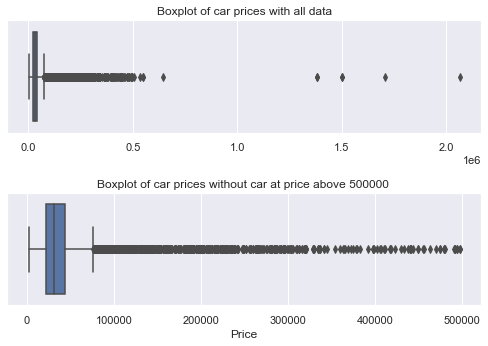

In [24]:
#Check main statistics 
display(df_copy['MSRP'].describe())
display(df_copy[df_copy['MSRP']>500000][['MSRP']].value_counts())
#Create a boxplot for Price in each dataframe with and without car at price above 500000 
fig,axs=plt.subplots(2,1)
sns.boxplot(x='MSRP',data=df_copy,ax=axs[0])
sns.boxplot(x='MSRP',data=df_copy[df_copy['MSRP']<500000],ax=axs[1])
axs[0].set(title='Boxplot of car prices with all data')
axs[0].xaxis.label.set_visible(False)
axs[1].set(title='Boxplot of car prices without car at price above 500000 ',xlabel='Price')
plt.tight_layout(pad=1.15)
plt.show()

You can see that there are middle class and high class cars in the base. I think there should be a separation between the middle class segment and the upscale cars, which are outlier observations in this base. These cases should be considered separately, and I believe that for the purposes of this study they should not be taken into account, so I remove them from the database.

In [25]:
df_copy.drop(df_copy[df_copy['MSRP'] >= 500000].index,inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               10571 non-null  object 
 1   Model              10571 non-null  object 
 2   Year               10571 non-null  int64  
 3   Engine Fuel Type   10571 non-null  object 
 4   Engine HP          10571 non-null  float64
 5   Engine Cylinders   10571 non-null  float64
 6   Transmission Type  10571 non-null  object 
 7   Driven_Wheels      10571 non-null  object 
 8   Number of Doors    10571 non-null  float64
 9   Market Category    10571 non-null  object 
 10  Vehicle Size       10571 non-null  object 
 11  Vehicle Style      10571 non-null  object 
 12  highway MPG        10571 non-null  int64  
 13  city mpg           10571 non-null  int64  
 14  Popularity         10571 non-null  int64  
 15  MSRP               10571 non-null  int64  
dtypes: float64(3), int64(5

We will recode the categorical variables into binary variables before splitting the set into training and test sets. This will be used later in the modeling process

In [26]:
#Divide features into target, categorical, numerical
target=['MSRP']
cat_features=df_copy.select_dtypes(include='object').columns.values.tolist()
cat_features.remove('Make')
cat_features.remove('Model')
num_features=df_copy.select_dtypes(exclude='object').columns.values.tolist()
num_features.remove('MSRP')

# One hot encoding
dummLev = pd.get_dummies(df_copy[cat_features], drop_first=True)

# Combination of numeric, categorical on hot encoding and target variables
df_new = pd.concat([df_copy, dummLev], axis=1)
display(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 11913
Data columns (total 57 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Make                                                        10571 non-null  object 
 1   Model                                                       10571 non-null  object 
 2   Year                                                        10571 non-null  int64  
 3   Engine Fuel Type                                            10571 non-null  object 
 4   Engine HP                                                   10571 non-null  float64
 5   Engine Cylinders                                            10571 non-null  float64
 6   Transmission Type                                           10571 non-null  object 
 7   Driven_Wheels                                               10571 non-null  object 
 

None

## 4.Exploratory and Data analysis

Before we move on to exploratory analysis, it is useful to separate some of the data that will be used for final validation at the end from our collection. The set will not be used in subsequent stages of the project and will constitute a test set

In [27]:
#Divide dataset to train and test and save them
train_set, test_set = train_test_split(df_new,test_size=0.2,random_state=42)
train_set.to_csv(path+'\\data\\train_set.csv')
test_set.to_csv(path+'\\data\\test_set.csv')

#### 4.1 Car prirce

Let's start by looking at the distribution of car prices in this database

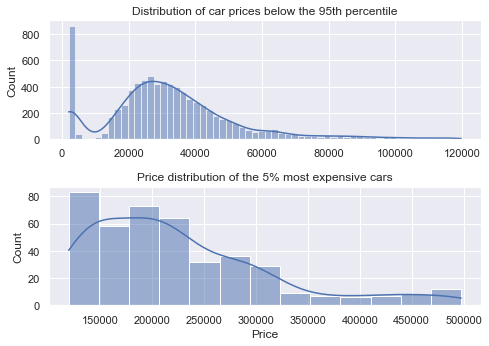

Array of the 5% of the most expensive car brands:


Make         
Aston Martin     68
Bentley          64
Ferrari          56
Mercedes-Benz    44
Lamborghini      39
Porsche          34
Rolls-Royce      28
Audi             23
Maserati         17
BMW              15
Land Rover       12
Maybach          11
McLaren           4
Lexus             3
Nissan            2
Tesla             1
Dodge             1
Ford              1
Acura             1
dtype: int64

In [28]:
fig, axs = plt.subplots(2, 1)
#Two histplots for two price range 
sns.histplot(data=train_set[train_set['MSRP']<np.quantile(train_set["MSRP"],0.95)],x='MSRP',kde=True,ax=axs[0])
sns.histplot(data=train_set[train_set['MSRP']>=np.quantile(train_set["MSRP"],0.95)],x='MSRP',kde=True,ax=axs[1])
axs[0].set(title="Distribution of car prices below the 95th percentile")
axs[0].xaxis.label.set_visible(False)
axs[1].set(title="Price distribution of the 5% most expensive cars",xlabel='Price')
plt.tight_layout(pad=1.15)
plt.show()
print('Array of the 5% of the most expensive car brands:')
display(train_set[train_set['MSRP']>=np.quantile(train_set["MSRP"],0.95)][['Make']].value_counts())

I had to determine two distributions to better present the price ranges the cars fall into. Also, I presented the 5% most expensive car brands in our database. 
These are, for example, the cars of Aston Martin, Bentley, Ferrari, Mercedes Benz, or Lamborghini. It's also worth looking at those cars priced under 10000, as they stand out in this distribution

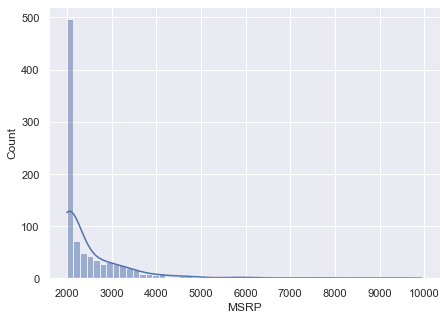

In [29]:
sns.histplot(data=train_set[train_set['MSRP']<=10000],x='MSRP',kde=True)
plt.show()

In [30]:
train_set[train_set['MSRP']<5000].describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded required/E85),...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.0,895.0,...,895.000000,895.000000,895.000000,895.0,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,1995.518436,169.237989,5.486034,2.941899,23.392179,17.395531,1474.658101,2410.608939,0.0,0.0,...,0.049162,0.010056,0.139665,0.0,0.115084,0.052514,0.007821,0.098324,0.244693,0.056983
std,2.964262,55.280496,1.466088,0.952436,5.025588,3.939416,1525.617035,618.609801,0.0,0.0,...,0.216327,0.099829,0.346833,0.0,0.319301,0.223186,0.088140,0.297919,0.430145,0.231940
min,1990.000000,55.000000,3.000000,2.000000,14.000000,10.000000,26.000000,2000.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,133.000000,4.000000,2.000000,20.000000,15.000000,535.000000,2000.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1996.000000,162.000000,6.000000,3.000000,23.000000,17.000000,870.000000,2065.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1998.000000,203.000000,6.000000,4.000000,26.000000,19.000000,2009.000000,2649.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2000.000000,402.000000,12.000000,4.000000,42.000000,34.000000,5657.000000,4976.000000,0.0,0.0,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It is interesting that there are so many cars in the database worth less than 5000. As you can see from the statistics, such a low price is probably caused by the year of production of these cars, which are simply old (less than 2000). Now, let's look on most frequent car models.

#### 4.2 Car brands

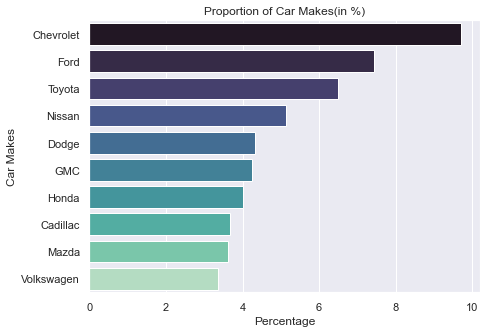

In [31]:
#Create a percentage proportion of car brands
make_percentage=train_set['Make'].value_counts()*100/sum(train_set['Make'].value_counts())
#Create barplot
sns.barplot(x=make_percentage[:10],y=make_percentage.index[:10],palette='mako')
plt.xlabel('Percentage')
plt.ylabel('Car Makes')
plt.title('Proportion of Car Makes(in %)')
plt.show()

According to this barplot, we can see that the brand that has sold the most models is Chevrolet (almost 10%). In addition 10 most recurrent car brands in that dataset represent around 50% of total number of cars

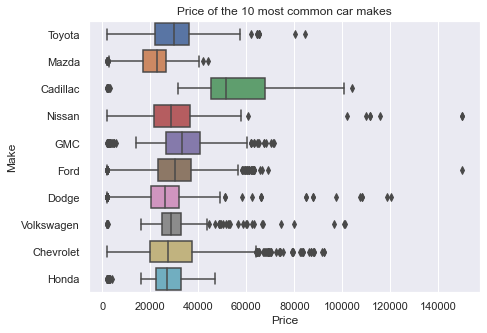

In [32]:
frequent_make_cars=train_set[train_set['Make'].isin(make_percentage.index[:10])]
ax=sns.boxplot(data=frequent_make_cars,y='Make',x='MSRP')
ax.set(xlabel='Price', title='Price of the 10 most common car makes')
plt.show()

The most of them presents a similar statistics of price and differences between them are little. Only Cadillac stands out, and on average it's significantly more expensive than the other popular brands.

#### 4.3 Year of car production

Another interesting variable is the year of car production. Let's look at its distribution

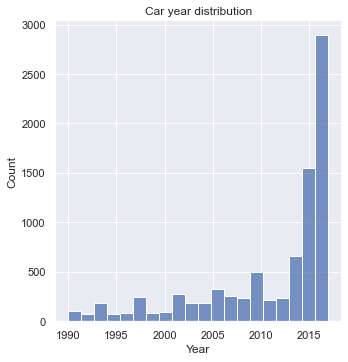

In [33]:
sns.displot(data=train_set, x='Year',bins=20)
plt.title('Car year distribution')
plt.show()

The database includes most new cars whose year of manufacture exceeds 2015. Let's see how the year of production affects the price

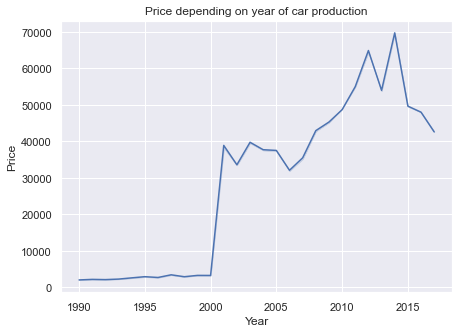

In [34]:
sns.lineplot(data=train_set,x='Year',y='MSRP',ci=False)
plt.ylabel('Price')
plt.title('Price depending on year of car production')
plt.show()

Based on the graph, the price variation can be divided into 3 periods of car production. The first is between 1990-2000, the next 2001-2007 and last above 2008. So let's create three boxplots according to these divisions

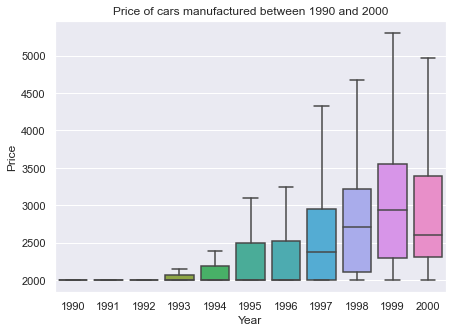

In [35]:
#showfliers=False -> no outliers in the graph
sns.boxplot(data=train_set[train_set['Year']<=2000],x='Year',y='MSRP',showfliers=False)
plt.ylabel('Price')
plt.title('Price of cars manufactured between 1990 and 2000')

plt.show()
                           

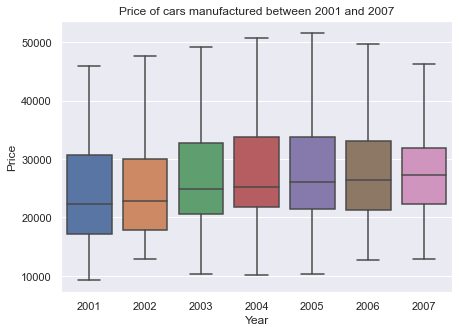

In [36]:
sns.boxplot(data=train_set[(train_set['Year']>2000) & (train_set['Year']<2008)],x='Year',y='MSRP',showfliers=False)
plt.ylabel('Price')
plt.title('Price of cars manufactured between 2001 and 2007')
plt.show()

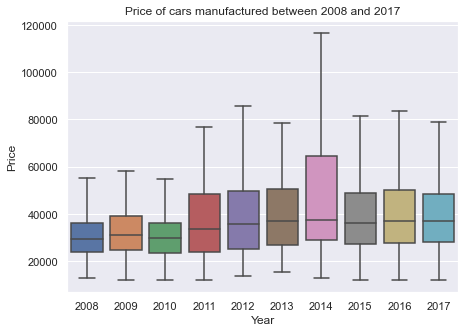

In [37]:
sns.boxplot(data=train_set[train_set['Year']>=2008],x='Year',y='MSRP',showfliers=False)
plt.ylabel('Price')
plt.title('Price of cars manufactured between 2008 and 2017')
plt.show()

The graphs were created without including outliers for better clarity. It can be deduced that the biggest changes can be seen in the first graph between 1990 and 2000, where for old cars every year matters. In the case of the second figure, between 2001 and 2007, the price of cars oscillates between 20,000 dollars and 30,000 dollars. The last graph for cars made in 2008 and newer does not show significant differences compared to the previous graph. The price of cars is between 30 and 40 thousand. A special year is 2014, from which the most cars come and the boxplot for this year shows the highest values. After this year there is a decrease

#### 4.4 Transmission type

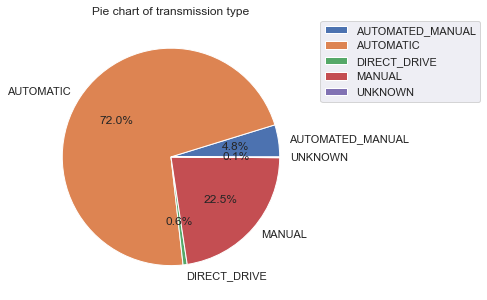

In [38]:
data_to_pie=train_set.groupby('Transmission Type')['Transmission Type'].count()
plt.pie(data_to_pie,labels=data_to_pie.keys(),autopct="%.1f%%",)
plt.title("Pie chart of transmission type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [39]:
train_set.groupby('Transmission Type')[['MSRP']].median()


,MSRP
Transmission Type,
AUTOMATED_MANUAL,51400.0
AUTOMATIC,33395.0
DIRECT_DRIVE,35282.5
MANUAL,19776.0
UNKNOWN,2362.0


The most popular transmission type is automatic (it states 72% of data in our set) and it is a second most expensive type of cars (median price is 33395).However, the most expensive cars are those with automated manual transmissions (the median is 51400) and account for 4.8% of all cars in database

In the database there are many other variables that can be represented graphically, however, they are in my opinion a secondary issue and it is worth moving on to the next stage of modeling

## 5. Feature selection 

There are many methods for selecting explanatory variables that can help you make the right decisions. I chose to primarily examine the correlations between variables and use a statistic called mutual information.

#### 5.1. Correlation matrix

In [40]:
data_for_selection=pd.concat([train_set[num_features],train_set[cat_features],train_set[target]],axis=1)
le = preprocessing.LabelEncoder()
for feature in cat_features:
    # Let's match the data (create a map and apply it to the variable right away)
    data_for_selection[feature] = le.fit_transform(train_set[feature])
data_for_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8456 entries, 7446 to 8210
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               8456 non-null   int64  
 1   Engine HP          8456 non-null   float64
 2   Engine Cylinders   8456 non-null   float64
 3   Number of Doors    8456 non-null   float64
 4   highway MPG        8456 non-null   int64  
 5   city mpg           8456 non-null   int64  
 6   Popularity         8456 non-null   int64  
 7   Engine Fuel Type   8456 non-null   int32  
 8   Transmission Type  8456 non-null   int32  
 9   Driven_Wheels      8456 non-null   int32  
 10  Market Category    8456 non-null   int32  
 11  Vehicle Size       8456 non-null   int32  
 12  Vehicle Style      8456 non-null   int32  
 13  MSRP               8456 non-null   int64  
dtypes: float64(3), int32(6), int64(5)
memory usage: 792.8 KB


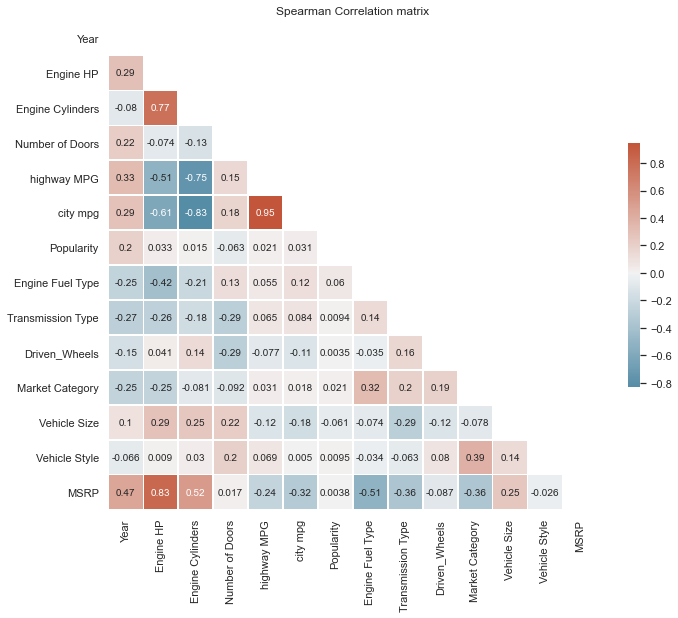

In [41]:
#Let's calculate correlation using spearman method
corr_matrix=data_for_selection.corr('spearman')
#Create a heatmap without no repetition
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))
cmap=sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,annot_kws={"size":10})
plt.title('Spearman Correlation matrix')
plt.savefig(path+'\\img\\corr_matrix.png')
plt.show()


Very High correlation(0.95) appear between highway mpg and city mpg. Very High correlation appear between highway mpg and city mpg. When look at relation between dependent variable and them, it can believe that mpg variables give the same information, so maybe should delete it.
Also there is a high correlation between Engine cylinders and Engine HP variables, which is intuitive because more cylinders translate into more power in the car. 

On the other hand, Highway mpg / Engine Cylinders have a strong negative correlation with highway(-0.75) and city MPG(-0.83) because lower MPG figures mean higher fuel consumption.
Looking at the dependent variable, it is worth noting specifically the 4 variables: Year, Engine HP, Engine Cylinders, Engine Fuel Type. They have the highest correlation/anti-correlation and are likely to have the highest predictive value

##### 5.2 Mutual Information

In [42]:
#List for results
mut_info=[]
#Calculation for categorical and continuous variables
for feature in cat_features:
    mut_info.append(feature_selection.mutual_info_regression(data_for_selection[feature].values.reshape(-1,1),data_for_selection['MSRP'].values)[0])
for feature in num_features:
    mut_info.append(feature_selection.mutual_info_regression(data_for_selection[feature].values.reshape(-1,1),data_for_selection['MSRP'].values)[0])
    
mut_info_list = list(zip(mut_info, cat_features+num_features))
mut_info_list.sort(reverse=True)
display('Sorted list with variable and its mutual information',mut_info_list)

'Sorted list with variable and its mutual information'

[(1.144021178187737, 'Engine HP'),
 (0.40837961877973106, 'Year'),
 (0.3555775718099523, 'Engine Cylinders'),
 (0.21242685961374952, 'Driven_Wheels'),
 (0.18287454889424248, 'highway MPG'),
 (0.17911340340008097, 'city mpg'),
 (0.1754452663142636, 'Vehicle Size'),
 (0.14243360965322194, 'Transmission Type'),
 (0.1285490625657011, 'Market Category'),
 (0.12171051036174796, 'Engine Fuel Type'),
 (0.11481642090890531, 'Vehicle Style'),
 (0.1082092964744108, 'Number of Doors'),
 (0.10378507344510601, 'Popularity')]

According to mutual information, it can be confirmed that Engine HP and Year are the two most significant variables for the price modeling process. Equally important is Engine Cylinders. On the other hand, the variables Number of Doors and Popularity

Finally, let's perform a transformation of two variables into one before moving on to modeling. Let's scale highway mpg and city mpg in Average total mpg

In [43]:
train_set['average total mpg']=train_set[['highway MPG','city mpg']].mean(axis=1)
display(train_set[['highway MPG','city mpg','average total mpg']].head())

test_set['average total mpg']=test_set[['highway MPG','city mpg']].mean(axis=1)
display(test_set[['highway MPG','city mpg','average total mpg']].head())

num_features.append('average total mpg')
num_features.remove('highway MPG')
num_features.remove('city mpg')

,highway MPG,city mpg,average total mpg
7446,32,26,29.0
358,37,25,31.0
1691,20,15,17.5
11273,26,19,22.5
849,31,21,26.0


,highway MPG,city mpg,average total mpg
1357,30,21,25.5
7829,26,18,22.0
10856,24,19,21.5
11387,21,12,16.5
1466,22,20,21.0


## 6. Modelling

It is a good idea to standardize the numerical variables before you start modeling, since many of them have different measures and different magnitudes. Also, it will be easier to compare models if the variables are standardized.

In [44]:
train_set[num_features] = train_set[num_features].apply(lambda x: (x-x.mean())/x.std())
train_set[['MSRP']] = train_set[['MSRP']].apply(lambda x: (x-x.mean())/x.std())

test_set[num_features] = test_set[num_features].apply(lambda x: (x-x.mean())/x.std())
test_set[['MSRP']] = test_set[['MSRP']].apply(lambda x: (x-x.mean())/x.std())

Let's start the modeling process with a simple linear regression model

#### 6.1 Linear regression 

Linear regression is a basic and commonly used type of predictive analysis. It is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables)

In modeling, it is worthwhile to take care of the correct transformation of categorical data. In the linear regression and SVM, we will use the previously created binary variables

In [45]:
train_linreg=pd.concat([train_set[num_features],train_set[dummLev.columns.tolist()],train_set[target]],axis=1)
display(train_linreg.head())
ind_features=num_features+dummLev.columns.tolist()
ind_features

,Year,Engine HP,Engine Cylinders,Number of Doors,Popularity,average total mpg,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_other,...,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon,MSRP
7446,-2.148111,-1.488833,-0.979467,-1.688503,0.319613,0.662229,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-0.801058
358,0.579000,-0.664850,-0.979467,0.616070,-0.673231,0.887277,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-0.345202
1691,-1.861047,-0.972712,0.157051,-1.688503,-0.673231,-0.631796,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.786954
11273,0.291936,0.095750,0.157051,0.616070,0.319613,-0.069176,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.181316
849,0.004872,-0.429426,-0.979467,0.616070,-0.817520,0.324657,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.240659


['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'Popularity',
 'average total mpg',
 'Engine Fuel Type_electric',
 'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
 'Engine Fuel Type_flex-fuel (unleaded/E85)',
 'Engine Fuel Type_other',
 'Engine Fuel Type_premium unleaded (recommended)',
 'Engine Fuel Type_premium unleaded (required)',
 'Engine Fuel Type_regular unleaded',
 'Transmission Type_AUTOMATIC',
 'Transmission Type_DIRECT_DRIVE',
 'Transmission Type_MANUAL',
 'Transmission Type_UNKNOWN',
 'Driven_Wheels_four wheel drive',
 'Driven_Wheels_front wheel drive',
 'Driven_Wheels_rear wheel drive',
 'Market Category_Diesel',
 'Market Category_Exotic',
 'Market Category_Factory Tuner',
 'Market Category_Flex Fuel',
 'Market Category_Hatchback',
 'Market Category_High-Performance',
 'Market Category_Hybrid',
 'Market Category_Luxury',
 'Market Category_Other',
 'Market Category_Performance',
 'Vehicle Size_Large',
 'Vehicle Size_Midsize',
 'Vehicle Style_2

In [46]:
#Create first linear model with constant
mod=sm.OLS(train_linreg[['MSRP']],sm.add_constant(train_linreg[ind_features]))
results=mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     749.9
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        15:57:17   Log-Likelihood:                -5034.2
No. Observations:                8456   AIC:                         1.016e+04
Df Residuals:                    8408   BIC:                         1.050e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.1887      0.093      2.021      0.043       0.006       0.372
Year                                                           0.0773      0.008      9.833      0.000       0.062       0.093
Engine HP                                                      0.4011      0.013     29.801      0.000       0.375       0.428
Engine Cylinders                                               0.1509      0.011     13.556      0.000       0.129       0.173
Number of Doors                                               -0.0386      0.020     -1.886      0.059      -0.079       0.002
Popularity                                                    -0.0115      0.005     -2.208      0.027      -0.022      -0.001
average total mpg                                              0.1078      0.014      7.839      0.000       0.081       0.135
Engine Fuel Type_electric                                     -1.2541      0.342     -3.662      0.000      -1.925      -0.583
Engine Fuel Type_flex-fuel (premium unleaded required/E85)    -0.0167      0.094     -0.177      0.859      -0.201       0.168
Engine Fuel Type_flex-fuel (unleaded/E85)                     -0.2986      0.066     -4.515      0.000      -0.428      -0.169
Engine Fuel Type_other                                        -0.0806      0.102     -0.792      0.428      -0.280       0.119
Engine Fuel Type_premium unleaded (recommended)               -0.1867      0.060     -3.136      0.002      -0.303      -0.070
Engine Fuel Type_premium unleaded (required)                   0.0577      0.060      0.961      0.337      -0.060       0.175
Engine Fuel Type_regular unleaded                             -0.2190      0.058     -3.795      0.000      -0.332      -0.106
Transmission Type_AUTOMATIC                                   -0.1040      0.026     -4.028      0.000      -0.155      -0.053
Transmission Type_DIRECT_DRIVE                                -0.1600      0.315     -0.507      0.612      -0.778       0.458
Transmission Type_MANUAL                                      -0.1793      0.027     -6.760      0.000      -0.231      -0.127
Transmission Type_UNKNOWN                                     -0.4209      0.145     -2.909      0.004      -0.705      -0.137
Driven_Wheels_four wheel drive                                -0.1068      0.024     -4.400      0.000      -0.154      -0.059
Driven_Wheels_front wheel drive                               -0.0193      0.016     -1.208      0.227      -0.051       0.012
Driven_Wheels_rear wheel drive                                -0.1767      0.018    -10.062      0.000      -0.211      -0.142
Market Category_Diesel             

According to linear regression, we obtained an R^2 coefficient of 0.8, that is, we were able to explain 80% of the variation in the dependent variable. But what is more important in Ordinary least squared it is possible to interpret the individual coefficients standing by the variables. In the case of standardized variables, interpretation is a little more difficult but not impossible. For example, according to the model, a 1 standard deviation change in year will equal a 0.0773 standard deviation change in price with the other variables unchanged. Also, an increase in Engine Cylinders by 1 standard deviation will increase the price by 0.4011 standard deviation ceteris paribus.Let's see how the model performs on the test data



In [47]:
test_linreg=pd.concat([test_set[num_features],test_set[dummLev.columns.tolist()],test_set[target]],axis=1)
test_linreg

,Year,Engine HP,Engine Cylinders,Number of Doors,Popularity,average total mpg,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_other,...,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon,MSRP
1357,-1.123355,-1.071038,-0.987532,0.603618,-1.069400,0.252260,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-0.488455
7829,0.593540,0.863685,0.177998,-1.726039,-0.955116,-0.126706,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.497232
10856,-2.124877,-1.128222,-0.987532,-1.726039,0.312467,-0.180844,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.845936
11387,0.736614,3.741942,2.509060,-1.726039,0.202364,-0.722225,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1.525021
1466,-0.264908,1.263972,1.343529,0.603618,-0.381602,-0.234982,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.120335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,0.593540,-1.071038,-0.987532,0.603618,0.327798,1.280883,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-0.384545
347,0.879689,0.758847,0.177998,-1.726039,0.312467,-0.289120,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.120335
11275,0.307391,-0.680281,-0.987532,0.603618,0.327798,-0.018430,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.155339
1168,0.879689,0.549173,0.177998,0.603618,-0.704944,-0.180844,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.112497


In [48]:
preds=results.predict(sm.add_constant(test_linreg[ind_features]))

#Some statistics to evaluate a linear model
print('R^2 score: ',metrics.r2_score(test_linreg['MSRP'],preds))
print("Mean squared error: %.2f" % metrics.mean_squared_error(test_linreg["MSRP"], preds))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(test_linreg['MSRP'], preds))   

#Create Dataframe with statistics to compare
results_df = pd.DataFrame(data=[["Linear Regression",results.rsquared,metrics.r2_score(test_linreg["MSRP"],preds) ,metrics.r2_score(test_linreg["MSRP"],preds),metrics.mean_squared_error(test_linreg["MSRP"],preds),metrics.mean_absolute_error(test_linreg["MSRP"],preds)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE'])

display(results_df)

R^2 score:  0.7789903580880139
Mean squared error: 0.22
Mean absolute error: 0.24


,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE
0,Linear Regression,0.807389,0.77899,0.77899,0.220905,0.235512


On the test data, the model achieved an R^2 of 0.78, which is a good baseline result that can only be improved. Let us propose regularizations to the linear model

##### Regularization

This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

We will use two regularization methods: Ridge and Lasso. In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.

Lasso regression is regularization can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. 

Source: https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In the models that follow, I will use pre-made wrappers that are based on cross-validation. This will help to get better results 

In [49]:
#Wrapper for linear model and regularization
def CVTestLinearReg(nFolds = 5, randomState=42, method = "linear", debug=False, features=ind_features, 
                    saveModels = False, *args, **kwargs):
    df=train_linreg.copy()
    # Let's prepare a cross-validation
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)
    # Let's record the results on the training set and the valid set:
    validResults = []
    trainResults = []
    predictions = []
    indices = []
    # Let's prepare a list of models to keep
    models = []
    for train, valid in kf.split(df.index.values):
        algorithm = {
        "linear":linear_model.LinearRegression,
        "lasso":linear_model.Lasso,
        "ridge":linear_model.Ridge,
        "elastic":linear_model.ElasticNet
        }
        # Preparing the estimator
        clf = algorithm[method](*args, **kwargs)
        if debug:
            print(clf)
        #Training the model
        clf.fit(df.iloc[train][features], df.iloc[train]['MSRP'])

    
        predsTrain = clf.predict(df.iloc[train][features])
        preds = clf.predict(df.iloc[valid][features])
        
        predictions.append(preds.tolist().copy())
        
        indices.append(df.iloc[valid].index.tolist().copy())
        
        #Statistics to evaluate model
        trainScore = metrics.mean_squared_error(df['MSRP'].iloc[train], predsTrain)
        validScore = metrics.mean_squared_error(df['MSRP'].iloc[valid], preds)
        
        trainResults.append(trainScore)
        validResults.append(validScore)
        
        if debug:
            print("Train MSE:", trainScore,
                  "Valid MSE:", validScore)
        if saveModels:
            models.append(clf)
        
    return trainResults, validResults, predictions, indices, models

In [50]:
trainResults, validResults, predictions, indices, models = CVTestLinearReg(method="linear",debug=True,saveModels=True)
print('Average Train MSE: ',np.mean(trainResults), 'Average Valid MSE:',np.mean(validResults))
preds=models[3].predict(test_linreg[ind_features])
print('R^2 score: ',metrics.r2_score(test_linreg['MSRP'],preds))
print("Mean squared error: %.2f" % metrics.mean_squared_error(test_linreg["MSRP"], preds))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(test_linreg["MSRP"], preds)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(test_linreg['MSRP'], preds))  

LinearRegression()
Train MSE: 0.19026160816146778 Valid MSE: 0.20408511021738865
LinearRegression()
Train MSE: 0.18566606854325735 Valid MSE: 0.22119964355001817
LinearRegression()
Train MSE: 0.1920361204946759 Valid MSE: 0.1959006472151046
LinearRegression()
Train MSE: 0.2006321422475699 Valid MSE: 0.16159324891640084
LinearRegression()
Train MSE: 0.1931721196078896 Valid MSE: 0.19106528291704988
Average Train MSE:  0.1923536118109721 Average Valid MSE: 0.1947687865631924
R^2 score:  0.7794330012244985
Mean squared error: 0.22
Root mean squared error: 0.47
Mean absolute error: 0.24


For the basic model, we obtained the same results. Let's check Lasso regression

In [51]:
for alpha in [0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 5]:
    trainResults, validResults, predictions, indices, models = CVTestLinearReg(method="lasso", alpha=alpha, random_state=42)
    print("Alpha:", alpha, "Average Train MSE", np.mean(trainResults), "Average Valid MSE: ", np.mean(validResults))

Alpha: 0.001 Average Train MSE 0.1945536345120582 Average Valid MSE:  0.1963936067676872
Alpha: 0.01 Average Train MSE 0.2115210241965531 Average Valid MSE:  0.2127248247084766
Alpha: 0.1 Average Train MSE 0.4662414887072523 Average Valid MSE:  0.46795770821493676
Alpha: 0.25 Average Train MSE 0.5216300001930037 Average Valid MSE:  0.5225799738656309
Alpha: 0.5 Average Train MSE 0.7091658283891962 Average Valid MSE:  0.7100188869103077
Alpha: 1 Average Train MSE 0.9998693294522271 Average Valid MSE:  0.9999833304222514
Alpha: 2 Average Train MSE 0.9998693294522271 Average Valid MSE:  0.9999833304222514
Alpha: 5 Average Train MSE 0.9998693294522271 Average Valid MSE:  0.9999833304222514


Unfortunately, the results didn't improve, they just got worse. Let's check out the Ridge method

In [52]:

for alpha in [0.1, 0.5, 2, 5, 10, 20, 100]:
    trainResults, validResults, predictions, indices, models = CVTestLinearReg(method="ridge", alpha=alpha, random_state=42)
    print("Alpha:", alpha, "Average Train MSE", np.mean(trainResults), "Average Valid MSE", np.mean(validResults))


Alpha: 0.1 Average Train MSE 0.19235520798805575 Average Valid MSE 0.19475793021505475
Alpha: 0.5 Average Train MSE 0.19237464725815392 Average Valid MSE 0.19474384620246635
Alpha: 2 Average Train MSE 0.19248741817830167 Average Valid MSE 0.19475541467130714
Alpha: 5 Average Train MSE 0.19280295482098134 Average Valid MSE 0.19493847034616346
Alpha: 10 Average Train MSE 0.1934681397787021 Average Valid MSE 0.19548469585734113
Alpha: 20 Average Train MSE 0.19502106593752488 Average Valid MSE 0.19692633703132345
Alpha: 100 Average Train MSE 0.2108709723802677 Average Valid MSE 0.21265062461489942


Unfortunately, again no improvement in performance was obtained. Let's move on to the next model which is SVM

#### 6.2 Support Vector Machine

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.


In [53]:
train_svm=pd.concat([train_set[num_features],train_set[dummLev.columns.tolist()],train_set[target]],axis=1)
ind_features=num_features+dummLev.columns.tolist()

In [54]:
# Let's prepare a simple wrapper with cross-validation SVM
def CVTestSVM(nFolds = 5, randomState=42, debug=False, features=ind_features, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)
    df=train_svm.copy()
    # Lists for Results:
    validMSE = []
    trainMSE = []
    trainR2=[]
    validR2=[]
    predictions = []
    indices = []
    
    for train, valid in kf.split(df.index.values):
        # Prepare estimator
        clf = SVR(max_iter=-1, tol=0.001, cache_size=500, *args, **kwargs)
        # Displaying the function call
        if debug:
            print(clf)

        # Training the model
        clf.fit(df.iloc[train][features], df.iloc[train]['MSRP'])

        # Prepare predictions for the training and test set
        predsTrain = clf.predict(df.iloc[train][features])
        preds = clf.predict(df.iloc[valid][features])
        
        predictions.append(preds.tolist().copy())
        
        indices.append(df.iloc[valid].index.tolist().copy())
        
        #Calculating statistics for model evaluation
        trainScoreMSE = metrics.mean_squared_error(df['MSRP'].iloc[train], predsTrain)
        validScoreMSE = metrics.mean_squared_error(df['MSRP'].iloc[valid], preds)
        trainScoreR2 = metrics.r2_score(df['MSRP'].iloc[train], predsTrain)
        validScoreR2 = metrics.r2_score(df['MSRP'].iloc[valid], preds)
        
        trainMSE.append(trainScoreMSE)
        validMSE.append(validScoreMSE)
        trainR2.append(trainScoreR2)
        validR2.append(validScoreR2)
        if debug:
            print("Train MSE:", trainScoreMSE,
                  "Valid MSE:", validScoreMSE,
                  "Train R2:", trainScoreR2,
                  "Valid R2:", validScoreR2)
       
    return trainMSE, validMSE,trainR2,validR2, predictions, indices

In [55]:
# train a SVR linear model (with default hyperparameter C)
trainMSE, validMSE,trainR2,validR2, predictions, indices = CVTestSVM(debug=True,kernel='linear')
print('Average Train MSE: ',np.mean(trainMSE), 'Average Valid MSE:',np.mean(validMSE))
print('Average Train R2: ',np.mean(trainR2), 'Average Valid R2:',np.mean(validR2))

SVR(cache_size=500, kernel='linear')
Train MSE: 0.21348954620070756 Valid MSE: 0.23225978684559237 Train R2: 0.7835197136548667 Valid R2: 0.7797175391354726
SVR(cache_size=500, kernel='linear')
Train MSE: 0.20709194436952666 Valid MSE: 0.2434311011926446 Train R2: 0.7897025466180206 Valid R2: 0.7704164360641279
SVR(cache_size=500, kernel='linear')
Train MSE: 0.21603938748914178 Valid MSE: 0.22099687821377897 Train R2: 0.784077921224913 Valid R2: 0.7783866835551945
SVR(cache_size=500, kernel='linear')
Train MSE: 0.2269323779263101 Valid MSE: 0.1742277985482027 Train R2: 0.7801241501659115 Valid R2: 0.7997900221192177
SVR(cache_size=500, kernel='linear')
Train MSE: 0.21740770236105053 Valid MSE: 0.21463350279808355 Train R2: 0.7816683519894073 Valid R2: 0.7888055061639649
Average Train MSE:  0.2161921916693473 Average Valid MSE: 0.21710981351966044
Average Train R2:  0.7838185367306238 Average Valid R2: 0.7834232374075956


SVM with linear kernel gave worse results than simple linear regression

In [56]:
# SVM with polynomial kernel, degree two
trainMSE, validMSE,trainR2,validR2, predictions, indices = CVTestSVM(debug=True,degree=2, kernel="poly")
print('Average Train MSE: ',np.mean(trainMSE), 'Average Valid MSE:',np.mean(validMSE))
print('Average Train R2: ',np.mean(trainR2), 'Average Valid R2:',np.mean(validR2))

SVR(cache_size=500, degree=2, kernel='poly')
Train MSE: 0.09951282965399427 Valid MSE: 0.10743637838225796 Train R2: 0.8990931113870166 Valid R2: 0.898103971686886
SVR(cache_size=500, degree=2, kernel='poly')
Train MSE: 0.0958467379032955 Valid MSE: 0.12359317159443195 Train R2: 0.9026696815397757 Valid R2: 0.8834374051886972
SVR(cache_size=500, degree=2, kernel='poly')
Train MSE: 0.10141860665955925 Valid MSE: 0.1222302128047053 Train R2: 0.8986364633277553 Valid R2: 0.8774288440255615
SVR(cache_size=500, degree=2, kernel='poly')
Train MSE: 0.10431041777791494 Valid MSE: 0.08906535542300546 Train R2: 0.898933144908412 Valid R2: 0.8976525388728337
SVR(cache_size=500, degree=2, kernel='poly')
Train MSE: 0.09979475661033806 Valid MSE: 0.09549983660010888 Train R2: 0.8997811326970973 Valid R2: 0.9060303289596029
Average Train MSE:  0.10017666972102042 Average Valid MSE: 0.10756499096090191
Average Train R2:  0.8998227067720113 Average Valid R2: 0.8925306177467162


SVM with polynomial kernel(second degree) give better results than simple linear regression. Let's check RBF kernel

In [57]:
# SVM with rbf kernel
trainMSE, validMSE,trainR2,validR2, predictions, indices = CVTestSVM(debug=True, kernel="rbf")
print('Average Train MSE: ',np.mean(trainMSE), 'Average Valid MSE:',np.mean(validMSE))
print('Average Train R2: ',np.mean(trainR2), 'Average Valid R2:',np.mean(validR2))

SVR(cache_size=500)
Train MSE: 0.0718195623130399 Valid MSE: 0.08670731006414151 Train R2: 0.9271743291819434 Valid R2: 0.9177640697286502
SVR(cache_size=500)
Train MSE: 0.06679846759296534 Valid MSE: 0.10359108011652705 Train R2: 0.9321675806010425 Valid R2: 0.9023016810563672
SVR(cache_size=500)
Train MSE: 0.074599562944936 Valid MSE: 0.0910266754889137 Train R2: 0.9254409443852311 Valid R2: 0.9087194190112976
SVR(cache_size=500)
Train MSE: 0.07061308551039099 Valid MSE: 0.06869634213231984 Train R2: 0.9315826488583042 Valid R2: 0.9210591349175703
SVR(cache_size=500)
Train MSE: 0.07242940821835528 Valid MSE: 0.063917749746407 Train R2: 0.9272627791517539 Valid R2: 0.9371063854018632
Average Train MSE:  0.07125201731593751 Average Valid MSE: 0.08278783150966182
Average Train R2:  0.928725656435655 Average Valid R2: 0.9173901380231497


SVM with RBF kernel give best results from all SVM estimator.  Finally, let's check the effect of the size of the parameter C on estimate. Let's see if we can further improve the model.

In [58]:
for c in [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10, 25, 50, 100]:
    trainMSE, validMSE,trainR2,validR2, predictions, indices= CVTestSVM(debug=False, kernel="rbf", C=c)
    print(c,'Average Train MSE: ',np.mean(trainMSE), 'Average Valid MSE:',np.mean(validMSE))
    print(c,'Average Train R2: ',np.mean(trainR2), 'Average Valid R2:',np.mean(validR2))
    print('----------------------------------------------------')

0.01 Average Train MSE:  0.5235733170152462 Average Valid MSE: 0.5262352832869786
0.01 Average Train R2:  0.4763595283963237 Average Valid R2: 0.4746387642955991
----------------------------------------------------
0.1 Average Train MSE:  0.16762401265850146 Average Valid MSE: 0.17397205074347422
0.1 Average Train R2:  0.8323679573422977 Average Valid R2: 0.8265881657837106
----------------------------------------------------
0.25 Average Train MSE:  0.12152576561762647 Average Valid MSE: 0.12941010317701834
0.25 Average Train R2:  0.8784763719005152 Average Valid R2: 0.8710647410726136
----------------------------------------------------
0.5 Average Train MSE:  0.09232089560802001 Average Valid MSE: 0.10203466775934537
0.5 Average Train R2:  0.9076698597816015 Average Valid R2: 0.8983351750105439
----------------------------------------------------
1 Average Train MSE:  0.07125201731593751 Average Valid MSE: 0.08278783150966182
1 Average Train R2:  0.928725656435655 Average Valid R2: 

As the C parameter increased, the MSE error decreased. However, C cannot be taken too large because it will lead to overfitting, so it was decided to choose an SVM model with RBF kernel and parameter C=2. Let's evaluate best estimator on test data.

In [59]:
test_svm=pd.concat([test_set[num_features],test_set[dummLev.columns.tolist()],test_set[target]],axis=1)

In [60]:
svr_best= SVR(max_iter=-1, tol=0.001, cache_size=500, kernel='rbf',C=2)
svr_best.fit(train_svm[ind_features],train_svm['MSRP'])
preds=svr_best.predict(test_svm[ind_features])

print('R^2 score: ',metrics.r2_score(test_svm['MSRP'],preds))
print("Mean squared error: %.2f" % metrics.mean_squared_error(test_svm["MSRP"], preds))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(test_svm['MSRP'], preds))   

#Create Dataframe with statistics to compare
results_df=results_df.append(pd.DataFrame(data=[["SVR(kernel=RBF,C=2)",svr_best.score(train_svm[ind_features],train_svm['MSRP']),svr_best.score(test_svm[ind_features],test_svm['MSRP']),metrics.r2_score(test_svm["MSRP"],preds),metrics.mean_squared_error(test_svm["MSRP"],preds),metrics.mean_absolute_error(test_svm["MSRP"],preds)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE']),ignore_index=True)

display(results_df)

R^2 score:  0.9246888198234645
Mean squared error: 0.08
Mean absolute error: 0.12


,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE
0,Linear Regression,0.807389,0.778990,0.778990,0.220905,0.235512
1,"SVR(kernel=RBF,C=2)",0.948425,0.924689,0.924689,0.075276,0.117617


It can be seen that using a more sophisticated model such as SVM and simple tuning of hyperparameters produced much better results than linear regression

Let's move to the last algorithm, which will be used in this project - Random Forest

#### 6.3 Random Forest

"A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.
Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model."

Source : https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [61]:
train_forest=pd.concat([train_set[num_features],train_set[dummLev.columns.tolist()],train_set[target]],axis=1)
ind_features=num_features+dummLev.columns.tolist()

In [62]:
# Let's prepare a simple wrapper for Random Forest
def CVTestRFRegressor(nFolds = 5, randomState=42, debug=False, features=ind_features, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)
    df=train_svm.copy()
    # Lists for Results:
    validMSE = []
    trainMSE = []
    trainR2=[]
    validR2=[]
    predictions = []
    indices = []
    
    for train, valid in kf.split(df.index.values):
        # Prepare estimator
        clf = RandomForestRegressor(*args, **kwargs, random_state=randomState, n_jobs=-1)
        # Displaying the function call
        if debug:
            print(clf)

      # Training the model
        clf.fit(df.iloc[train][features], df.iloc[train]['MSRP'])

        # Prepare predictions for the training and test set
        predsTrain = clf.predict(df.iloc[train][features])
        preds = clf.predict(df.iloc[valid][features])
        
        predictions.append(preds.tolist().copy())
        
        indices.append(df.iloc[valid].index.tolist().copy())
         #Calculating statistics for model evaluation       
        trainScoreMSE = metrics.mean_squared_error(df['MSRP'].iloc[train], predsTrain)
        validScoreMSE = metrics.mean_squared_error(df['MSRP'].iloc[valid], preds)
        trainScoreR2 = metrics.r2_score(df['MSRP'].iloc[train], predsTrain)
        validScoreR2 = metrics.r2_score(df['MSRP'].iloc[valid], preds)
        
        trainMSE.append(trainScoreMSE)
        validMSE.append(validScoreMSE)
        trainR2.append(trainScoreR2)
        validR2.append(validScoreR2)
        if debug:
            print("Train MSE:", trainScoreMSE,
                  "Valid MSE:", validScoreMSE,
                  "Train R2:", trainScoreR2,
                  "Valid R2:", validScoreR2)
       
    return trainMSE, validMSE,trainR2,validR2, predictions, indices

In [63]:
trainMSE, validMSE,trainR2,validR2, predictions, indices = CVTestRFRegressor(debug=True)
print('Average Train MSE: ',np.mean(trainMSE), 'Average Valid MSE:',np.mean(validMSE))
print('Average Train R2: ',np.mean(trainR2), 'Average Valid R2:',np.mean(validR2))

RandomForestRegressor(n_jobs=-1, random_state=42)
Train MSE: 0.005389444539321818 Valid MSE: 0.02500623894490224 Train R2: 0.9945350556133706 Valid R2: 0.9762832992892932
RandomForestRegressor(n_jobs=-1, random_state=42)
Train MSE: 0.005658083916314111 Valid MSE: 0.02299834215899977 Train R2: 0.9942543364386052 Valid R2: 0.9783099146673896
RandomForestRegressor(n_jobs=-1, random_state=42)
Train MSE: 0.005223390799921744 Valid MSE: 0.022506844806074473 Train R2: 0.9947794454850023 Valid R2: 0.9774303756664029
RandomForestRegressor(n_jobs=-1, random_state=42)
Train MSE: 0.005563084193108269 Valid MSE: 0.01665722892186587 Train R2: 0.9946099015229309 Valid R2: 0.9808587179440299
RandomForestRegressor(n_jobs=-1, random_state=42)
Train MSE: 0.005047222748873912 Valid MSE: 0.018611772049134355 Train R2: 0.9949313274154007 Valid R2: 0.9816864388547654
Average Train MSE:  0.005376245239507971 Average Valid MSE: 0.021156085376195344
Average Train R2:  0.994622013295062 Average Valid R2: 0.97891

Without tuning hyperparameters, RandomForest gives the best results for this dataset. Let's tune to further improve the model and also combat the problem of overfitting. Let's start with n_estimators, which is the number of trees  

In [64]:
for k in [10, 25, 50, 100, 200, 500, 1000]:
    trainMSE, validMSE,trainR2,validR2, predictions, indices = CVTestRFRegressor(debug=False,n_estimators=k)
    print(k,'Average Train MSE: ',np.mean(trainMSE), 'Average Valid MSE:',np.mean(validMSE))
    print(k,'Average Train R2: ',np.mean(trainR2), 'Average Valid R2:',np.mean(validR2))
    print('--------------------------------------------------------')

10 Average Train MSE:  0.006827385115430124 Average Valid MSE: 0.02505098875105659
10 Average Train R2:  0.9931675966360196 Average Valid R2: 0.9750942858420734
--------------------------------------------------------
25 Average Train MSE:  0.005985827057092894 Average Valid MSE: 0.022261495570626205
25 Average Train R2:  0.9940111524063859 Average Valid R2: 0.9778377824165003
--------------------------------------------------------
50 Average Train MSE:  0.005603542738931072 Average Valid MSE: 0.02121466006404654
50 Average Train R2:  0.9943953259882145 Average Valid R2: 0.9788557153534267
--------------------------------------------------------
100 Average Train MSE:  0.005376245239507971 Average Valid MSE: 0.021156085376195344
100 Average Train R2:  0.994622013295062 Average Valid R2: 0.9789137492843762
--------------------------------------------------------
200 Average Train MSE:  0.005250552284431285 Average Valid MSE: 0.020926896994908257
200 Average Train R2:  0.994746190222812

According to the results, a model with 200 trees will be the best choice. Now let's see how the tree depth will affect the results

In [65]:
for k in range(2,22,2):
    trainMSE, validMSE,trainR2,validR2, predictions, indices = CVTestRFRegressor(debug=False,n_estimators=200,max_depth=k)
    print(k,'Average Train MSE: ',np.mean(trainMSE), 'Average Valid MSE:',np.mean(validMSE))
    print(k,'Average Train R2: ',np.mean(trainR2), 'Average Valid R2:',np.mean(validR2))
    print('--------------------------------------------------------')

2 Average Train MSE:  0.24011998518512828 Average Valid MSE: 0.24568634705483955
2 Average Train R2:  0.7599035171344097 Average Valid R2: 0.7538953568091289
--------------------------------------------------------
4 Average Train MSE:  0.0820808803351516 Average Valid MSE: 0.09068930913300237
4 Average Train R2:  0.9179105446789322 Average Valid R2: 0.9093722752377612
--------------------------------------------------------
6 Average Train MSE:  0.03645382834875858 Average Valid MSE: 0.045689041946245776
6 Average Train R2:  0.9635421541073497 Average Valid R2: 0.9544245545290282
--------------------------------------------------------
8 Average Train MSE:  0.018013218037784908 Average Valid MSE: 0.0298837026888966
8 Average Train R2:  0.9819801435518626 Average Valid R2: 0.9701730549098798
--------------------------------------------------------
10 Average Train MSE:  0.010425768994931372 Average Valid MSE: 0.023829113930688078
10 Average Train R2:  0.9895681008783874 Average Valid R

In this case, a maximum depth of 16. Next parameter is a max features in one three.

In [66]:
for k in range(2,len(ind_features)+1,2):
    trainMSE, validMSE,trainR2,validR2, predictions, indices = CVTestRFRegressor(debug=False,n_estimators=200,max_depth=16,max_features=k)
    print(k,'Average Train MSE: ',np.mean(trainMSE), 'Average Valid MSE:',np.mean(validMSE))
    print(k,'Average Train R2: ',np.mean(trainR2), 'Average Valid R2:',np.mean(validR2))
    print('--------------------------------------------------------')

2 Average Train MSE:  0.01424256667797116 Average Valid MSE: 0.0357939475628864
2 Average Train R2:  0.9857456959963834 Average Valid R2: 0.9643665514888091
--------------------------------------------------------
4 Average Train MSE:  0.00895085000710858 Average Valid MSE: 0.029067700128166424
4 Average Train R2:  0.9910469234001497 Average Valid R2: 0.9709739354373642
--------------------------------------------------------
6 Average Train MSE:  0.007307604766900032 Average Valid MSE: 0.025864435623548426
6 Average Train R2:  0.9926903765025168 Average Valid R2: 0.9741109322089206
--------------------------------------------------------
8 Average Train MSE:  0.006616728478138556 Average Valid MSE: 0.023982735146301157
8 Average Train R2:  0.9933801793647616 Average Valid R2: 0.9760440184479208
--------------------------------------------------------
10 Average Train MSE:  0.006310465713039599 Average Valid MSE: 0.022622513819461936
10 Average Train R2:  0.9936863532304882 Average Val

The best result was found for max_features=20.In the next two loops we will check the operation of min_samples_split and min_samples_leaf

In [67]:
for k in [2, 4, 6, 8, 10, 15, 20, 30]:
    trainMSE, validMSE,trainR2,validR2, predictions, indices = CVTestRFRegressor(debug=False,n_estimators=200,max_depth=16,max_features=20,min_samples_split=k)
    print(k,'Average Train MSE: ',np.mean(trainMSE), 'Average Valid MSE:',np.mean(validMSE))
    print(k,'Average Train R2: ',np.mean(trainR2), 'Average Valid R2:',np.mean(validR2))
    print('--------------------------------------------------------')

2 Average Train MSE:  0.005513647374891488 Average Valid MSE: 0.01962870638842858
2 Average Train R2:  0.994482364026992 Average Valid R2: 0.9802849175560789
--------------------------------------------------------
4 Average Train MSE:  0.00728650624819725 Average Valid MSE: 0.020273992502764796
4 Average Train R2:  0.9927069317651045 Average Valid R2: 0.9796786947194663
--------------------------------------------------------
6 Average Train MSE:  0.00962364982824865 Average Valid MSE: 0.022027490137435515
6 Average Train R2:  0.9903695859236734 Average Valid R2: 0.9779580430059971
--------------------------------------------------------
8 Average Train MSE:  0.012267442561782794 Average Valid MSE: 0.02402335456494059
8 Average Train R2:  0.9877252157020102 Average Valid R2: 0.9760256862264095
--------------------------------------------------------
10 Average Train MSE:  0.014755885640443663 Average Valid MSE: 0.02604403572238202
10 Average Train R2:  0.9852371986644066 Average Valid

Since we must have at least 2 for the split then after the split we can only test values 1 and 2.

In [68]:
for k in [1,2]:
    trainMSE, validMSE,trainR2,validR2, predictions, indices = CVTestRFRegressor(debug=False,n_estimators=200,max_depth=16,max_features=20,min_samples_split=2,min_samples_leaf=k)
    print(k,'Average Train MSE: ',np.mean(trainMSE), 'Average Valid MSE:',np.mean(validMSE))
    print(k,'Average Train R2: ',np.mean(trainR2), 'Average Valid R2:',np.mean(validR2))
    print('--------------------------------------------------------')

1 Average Train MSE:  0.005513647374891488 Average Valid MSE: 0.019628706388428577
1 Average Train R2:  0.994482364026992 Average Valid R2: 0.9802849175560789
--------------------------------------------------------
2 Average Train MSE:  0.010344088600005037 Average Valid MSE: 0.023167009147595178
2 Average Train R2:  0.9896478452718858 Average Valid R2: 0.9768312502801054
--------------------------------------------------------


Finally, we obtained the best result for 200 trees,
depth 16, maximum number of variables 20, observations before split 2 and min in leaf after split 1.  Let's check it for the test set

In [69]:
test_forest=pd.concat([test_set[num_features],test_set[dummLev.columns.tolist()],test_set[target]],axis=1)

In [70]:
forest_best= RandomForestRegressor(n_estimators=200,max_depth=16,max_features=20,min_samples_split=2,min_samples_leaf=1,random_state=42)
forest_best.fit(train_forest[ind_features],train_forest['MSRP'])
preds=forest_best.predict(test_forest[ind_features])

print('R^2 score: ',metrics.r2_score(test_forest['MSRP'],preds))
print("Mean squared error: %.2f" % metrics.mean_squared_error(test_forest["MSRP"], preds))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(test_forest['MSRP'], preds))   

#Create Dataframe with statistics to compare
results_df=results_df.append(pd.DataFrame(data=[["RandomForest(n_estimators=200,max_depth=16,max_features=20,min_samples_split=2,min_samples_leaf=1)",forest_best.score(train_forest[ind_features],train_forest['MSRP']),forest_best.score(test_forest[ind_features],test_forest['MSRP']),metrics.r2_score(test_forest["MSRP"],preds),metrics.mean_squared_error(test_forest["MSRP"],preds),metrics.mean_absolute_error(test_forest["MSRP"],preds)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE']),ignore_index=True)

display(results_df)
#Save Results to 
results_df.to_csv(path+'\\data\\Results_eval_models.csv')

R^2 score:  0.9507759534970475
Mean squared error: 0.05
Mean absolute error: 0.10


,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE
0,Linear Regression,0.807389,0.778990,0.778990,0.220905,0.235512
1,"SVR(kernel=RBF,C=2)",0.948425,0.924689,0.924689,0.075276,0.117617
2,"RandomForest(n_estimators=200,max_depth=16,max...",0.994650,0.950776,0.950776,0.049201,0.098726


Random Forest on the test set scored 0.95 which is an improvement over the SVM model. 
In the case of Random Forest model, there is an additional method that helps to develop the result of the analysis, which is feature importance.

In [71]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + '-FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    #Save figure to png file
    plt.savefig(path+'\\img\\RandomForest-FeatureImportance.png')
    plt.show()

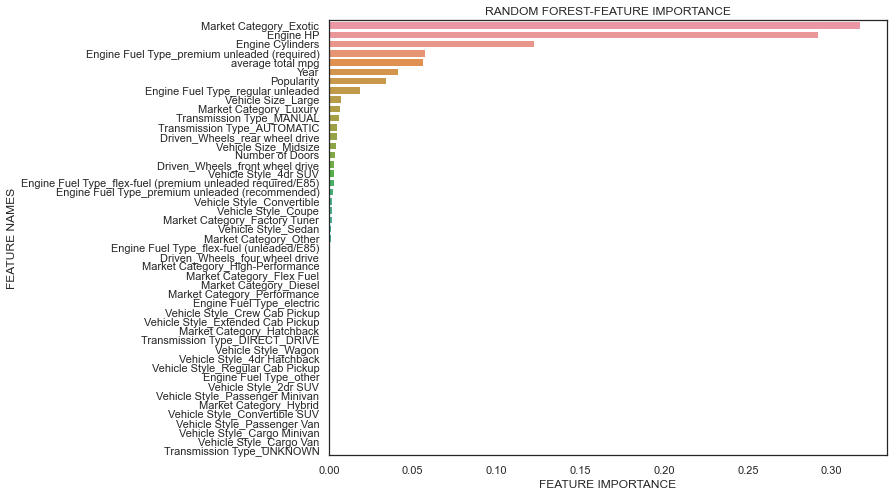

In [72]:
plot_feature_importance(forest_best.feature_importances_,ind_features,'RANDOM FOREST')


The graph is moderately clear due to the large number of variables. However, you can see that the most important variable is the binary variable that determines whether a car is exotic. Another key variable is Engine HP. Together these variables comprise 50% of the importance. Besides these, Engine Cylinders, average total mpg, Year and popularity were found to be the important variables in modeling the price of cars



## 7. Conclusion

In summary, the project presents an analysis of car data. The main objective of the study was to perform modeling and create the best estimator that would predict car prices. For this task 3 models were used: linear regression, Support vector machine and Random Forest. Hyperparameter tuning was performed for each of them. Finally, 3 evaluation statistics were calculated for each model: r square, mean squared error and mean absolute error. It turned out that among the estimated models, the best results were obtained by Random Forest, for which R^2 was as high as 0.948.

This is a good result, however I am convinced that better results can be achieved. Among other things, it would be worthwhile to take an interest in boosted decision trees from the xgboost library, which improve the results of classical decision tree-based models.
Probably more accurate feature generation process and data manipulation would also improve the results